In [1]:
# Writing the script to make the process automated

# Add this commentary on starting Jupyter  -  jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10

# This code was taken from the CoinMarketCap
# Pull the Data from the API

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e9100949-b2ff-4a7a-8314-22a17e6f124e',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc = True)
df.head(10)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9809,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.919444e+07,1.919444e+07,NaN,1,NaN,NaN,None,2022-10-31T14:40:00.000Z,20287.459088,3.865141e+10,10.5759,-2.012101,-2.116755,5.367433,5.065802,1.918836,-11.240230,3.894065e+11,38.7268,4.260366e+11,None,2022-10-31T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-31 14:41:36.864256+00:00
1,1027,Ethereum,ETH,ethereum,6165,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2022-10-31T14:40:00.000Z,1556.160666,1.726906e+10,2.6394,-3.924194,-2.385040,16.841089,17.533217,0.557289,-1.950439,1.904334e+11,18.9165,1.904334e+11,None,2022-10-31T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-31 14:41:36.864256+00:00
2,825,Tether,USDT,tether,41398,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.910309e+10,7.114177e+10,NaN,3,NaN,NaN,None,2022-10-31T14:40:00.000Z,1.000036,6.079302e+10,-2.9575,0.000256,-0.019295,-0.005887,-0.002007,0.002321,-0.015038,6.910561e+10,6.8767,7.114435e+10,None,2022-10-31T14:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-31 14:41:36.864256+00:00
3,1839,BNB,BNB,bnb,1131,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599784e+08,1.599800e+08,NaN,4,NaN,NaN,None,2022-10-31T14:40:00.000Z,323.846473,2.082213e+09,40.5639,-2.625929,4.384389,18.946700,14.599422,17.810059,15.729502,5.180845e+10,5.1464,6.476929e+10,None,2022-10-31T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-31 14:41:36.864256+00:00
4,3408,USD Coin,USDC,usd-coin,6634,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.352006e+10,4.352006e+10,NaN,5,NaN,NaN,None,2022-10-31T14:40:00.000Z,0.999958,4.016890e+09,-7.1693,-0.017518,-0.008958,-0.004555,0.009506,-0.013012,-0.033093,4.351823e+10,4.3235,4.351823e+10,None,2022-10-31T14:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-31 14:41:36.864256+00:00
5,52,XRP,XRP,xrp,829,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.008541e+10,9.998924e+10,NaN,6,NaN,NaN,None,2022-10-31T14:40:00.000Z,0.449903,1.246088e+09,-3.8147,-2.227097,-2.804944,-0.764855,-5.657762,38.545776,21.722150,2.253356e+10,2.2384,4.499026e+10,None,2022-10-31T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-31 14:41:36.864256+00:00
6,4687,Binance USD,BUSD,binance-usd,5358,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.139487e+10,2.139487e+10,NaN,7,NaN,NaN,None,2022-10-31T14:40:00.000Z,0.999865,7.412291e+09,0.1313,0.011836,0.000316,-0.021194,-0.030399,-0.022785,-0.009936,2.139198e+10,2.1287,2.139198e+10,None,2022-10-31T14:40:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-10-31 14:41:36.864256+00:00
7,74,Dogecoin,DOGE,dogecoin,587,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,None,2022-10-31T14:40:00.000Z,0.117441,5.609113e+09,-59.2791,-2.358521,-3.525640,98.932438,91.028640,90.868418,76.830233,1.558104e+10,1.5480,1.558104e+10,None,2022-10-31T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-31 14:41:36.864256+00:00
8,2010,Cardano,ADA,cardano,585,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.5

In [5]:
def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json
    import os

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e9100949-b2ff-4a7a-8314-22a17e6f124e',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # All the incoming data will append to the original dataframe
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc = True)
    df
    
    # Putting all the data into a csv
    # Checks if the file exists and creates one if not,appends the existing if yes
    if not os.path.isfile(r'D:\Portfolio\API\CryptoAPI.csv'):
        df.to_csv(r'D:\Portfolio\API\CryptoAPI.csv', header = 'column_names')
    else:
        df.to_csv(r'D:\Portfolio\API\CryptoAPI.csv', mode = 'a', header = False)

In [6]:
import os
from time import time
from time import sleep

# Only 333 api runs per day are allowed

for i in range(333):
    api_runner()
    print('API runner completed successfully')
    sleep(60) #Sleep for 1 minute
exit()

API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully


KeyboardInterrupt: 

In [7]:
# Reading our csv file

df3 = pd.read_csv(r'D:\Portfolio\API\CryptoAPI.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9809,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.919444e+07,1.919444e+07,NaN,1,NaN,NaN,NaN,2022-10-31T14:40:00.000Z,20287.459088,3.865141e+10,10.5759,-2.012101,-2.116755,5.367433,5.065802,1.918836,-11.240230,3.894065e+11,38.7268,4.260366e+11,NaN,2022-10-31T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-31 14:41:54.175472+00:00
1,1,1027,Ethereum,ETH,ethereum,6165,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2022-10-31T14:40:00.000Z,1556.160666,1.726906e+10,2.6394,-3.924194,-2.385040,16.841089,17.533217,0.557289,-1.950439,1.904334e+11,18.9165,1.904334e+11,NaN,2022-10-31T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-31 14:41:54.175472+00:00
2,2,825,Tether,USDT,tether,41398,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.910309e+10,7.114177e+10,NaN,3,NaN,NaN,NaN,2022-10-31T14:40:00.000Z,1.000036,6.079302e+10,-2.9575,0.000256,-0.019295,-0.005887,-0.002007,0.002321,-0.015038,6.910561e+10,6.8767,7.114435e+10,NaN,2022-10-31T14:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-31 14:41:54.175472+00:00
3,3,1839,BNB,BNB,bnb,1131,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",2.000000e+08,1.599784e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2022-10-31T14:40:00.000Z,323.846473,2.082213e+09,40.5639,-2.625929,4.384389,18.946700,14.599422,17.810059,15.729502,5.180845e+10,5.1464,6.476929e+10,NaN,2022-10-31T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-31 14:41:54.175472+00:00
4,4,3408,USD Coin,USDC,usd-coin,6634,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.352006e+10,4.352006e+10,NaN,5,NaN,NaN,NaN,2022-10-31T14:40:00.000Z,0.999958,4.016890e+09,-7.1693,-0.017518,-0.008958,-0.004555,0.009506,-0.013012,-0.033093,4.351823e+10,4.3235,4.351823e+10,NaN,2022-10-31T14:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-31 14:41:54.175472+00:00
5,5,52,XRP,XRP,xrp,829,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.008541e+10,9.998924e+10,NaN,6,NaN,NaN,NaN,2022-10-31T14:40:00.000Z,0.449903,1.246088e+09,-3.8147,-2.227097,-2.804944,-0.764855,-5.657762,38.545776,21.722150,2.253356e+10,2.2384,4.499026e+10,NaN,2022-10-31T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-31 14:41:54.175472+00:00
6,6,4687,Binance USD,BUSD,binance-usd,5358,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,2.139487e+10,2.139487e+10,NaN,7,NaN,NaN,NaN,2022-10-31T14:40:00.000Z,0.999865,7.412291e+09,0.1313,0.011836,0.000316,-0.021194,-0.030399,-0.022785,-0.009936,2.139198e+10,2.1287,2.139198e+10,NaN,2022-10-31T14:40:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-10-31 14:41:54.175472+00:00
7,7,74,Dogecoin,DOGE,dogecoin,587,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,NaN,2022-10-31T14:40:00.000Z,0.117441,5.609113e+09,-59.2791,-2.358521,-3.525640,98.932438,91.028640,90.868418,76.830233,1.558104e+10,1.5480,1.558104e+10,NaN,2022-10-31T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-31 14:41:54.175472+00:00
8,8,2010,Cardano,ADA,cardano,585,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', '

In [8]:
# Performing a slight cleaning on the Data

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df3.head(10)

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9809,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19194443.00000,19194443.00000,NaN,1,NaN,NaN,NaN,2022-10-31T14:40:00.000Z,20287.45909,38651406943.97784,10.57590,-2.01210,-2.11676,5.36743,5.06580,1.91884,-11.24023,389406477079.22943,38.72680,426036640847.76001,NaN,2022-10-31T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-31 14:41:54.175472+00:00
1,1,1027,Ethereum,ETH,ethereum,6165,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373863.49900,122373863.49900,NaN,2,NaN,NaN,NaN,2022-10-31T14:40:00.000Z,1556.16067,17269064656.54320,2.63940,-3.92419,-2.38504,16.84109,17.53322,0.55729,-1.95044,190433392957.64325,18.91650,190433392957.64001,NaN,2022-10-31T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-31 14:41:54.175472+00:00
2,2,825,Tether,USDT,tether,41398,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,69103092527.25810,71141766321.72455,NaN,3,NaN,NaN,NaN,2022-10-31T14:40:00.000Z,1.00004,60793022019.56422,-2.95750,0.00026,-0.01929,-0.00589,-0.00201,0.00232,-0.01504,69105605229.50679,6.87670,71144353153.50999,NaN,2022-10-31T14:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-31 14:41:54.175472+00:00
3,3,1839,BNB,BNB,bnb,1131,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,159978418.34738,159979963.59043,NaN,4,NaN,NaN,NaN,2022-10-31T14:40:00.000Z,323.84647,2082213432.59788,40.56390,-2.62593,4.38439,18.94670,14.59942,17.81006,15.72950,51808446505.67281,5.14640,64769294559.69000,NaN,2022-10-31T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-31 14:41:54.175472+00:00
4,4,3408,USD Coin,USDC,usd-coin,6634,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,43520062475.34109,43520062475.34109,NaN,5,NaN,NaN,NaN,2022-10-31T14:40:00.000Z,0.99996,4016890328.05446,-7.16930,-0.01752,-0.00896,-0.00455,0.00951,-0.01301,-0.03309,43518229678.79237,4.32350,43518229678.79000,NaN,2022-10-31T14:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-31 14:41:54.175472+00:00
5,5,52,XRP,XRP,xrp,829,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,50085407159.00000,99989240406.00000,NaN,6,NaN,NaN,NaN,2022-10-31T14:40:00.000Z,0.44990,1246087972.85713,-3.81470,-2.22710,-2.80494,-0.76485,-5.65776,38.54578,21.72215,22533556012.78001,2.23840,44990262215.99000,NaN,2022-10-31T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-31 14:41:54.175472+00:00
6,6,4687,Binance USD,BUSD,binance-usd,5358,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,21394874602.43925,21394874602.43925,NaN,7,NaN,NaN,NaN,2022-10-31T14:40:00.000Z,0.99986,7412291084.79343,0.13130,0.01184,0.00032,-0.02119,-0.03040,-0.02279,-0.00994,21391980181.49644,2.12870,21391980181.50000,NaN,2022-10-31T14:40:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-10-31 14:41:54.175472+00:00
7,7,74,Dogecoin,DOGE,dogecoin,587,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,132670764299.89407,132670764299.89407,NaN,8,NaN,NaN,NaN,2022-10-31T14:40:00.000Z,0.11744,5609112516.18655,-59.27910,-2.35852,-3.52564,98.93244,91.02864,90.86842,76.83023,15581043855.34152,1.54800,15581043855.34000,NaN,2022-10-

In [10]:
# Grouping and finding the average changes among the five times that our data has been appended
# Also I am going to create new dataframes each time just to see the actual changes that we are performing with the dataframes

df4 = df3.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-1.82879,-2.02461,5.51688,5.16612,2.02385,-11.21002
Ethereum,-3.69349,-2.26151,17.05810,17.71454,0.73583,-1.99058
Tether,0.00236,-0.01784,-0.00548,-0.00155,0.00311,-0.01374
BNB,-2.27429,4.60953,19.24584,14.84257,18.09506,15.93711
USD Coin,0.00346,0.00274,0.01103,0.00859,-0.00103,-0.02610
XRP,-2.03638,-2.73231,-0.61620,-5.56538,38.68156,21.80064
Binance USD,0.03967,0.00792,0.00086,0.00883,0.01200,0.01578
Dogecoin,-1.31134,-2.32370,100.91369,93.05024,92.98722,78.42175
Cardano,-2.57520,-2.19741,12.54817,-7.06798,-10.60928,-19.23716


In [11]:
df5 = df4.stack()
df5.head(30)

name                                  
Bitcoin   quote.USD.percent_change_1h     -1.82879
          quote.USD.percent_change_24h    -2.02461
          quote.USD.percent_change_7d      5.51688
          quote.USD.percent_change_30d     5.16612
          quote.USD.percent_change_60d     2.02385
          quote.USD.percent_change_90d   -11.21002
Ethereum  quote.USD.percent_change_1h     -3.69349
          quote.USD.percent_change_24h    -2.26151
          quote.USD.percent_change_7d     17.05810
          quote.USD.percent_change_30d    17.71454
          quote.USD.percent_change_60d     0.73583
          quote.USD.percent_change_90d    -1.99058
Tether    quote.USD.percent_change_1h      0.00236
          quote.USD.percent_change_24h    -0.01784
          quote.USD.percent_change_7d     -0.00548
          quote.USD.percent_change_30d    -0.00155
          quote.USD.percent_change_60d     0.00311
          quote.USD.percent_change_90d    -0.01374
BNB       quote.USD.percent_change_1h     -

In [12]:
type(df4)

pandas.core.frame.DataFrame

In [13]:
type(df5)

pandas.core.series.Series

In [14]:
# df5 has now became a series, so we can no longer treat it as a dataframe

df6 = df5.to_frame(name = 'Values')
df6.head(30)

Values
name                                           
Bitcoin  quote.USD.percent_change_1h   -1.82879
         quote.USD.percent_change_24h  -2.02461
         quote.USD.percent_change_7d    5.51688
         quote.USD.percent_change_30d   5.16612
         quote.USD.percent_change_60d   2.02385
         quote.USD.percent_change_90d -11.21002
Ethereum quote.USD.percent_change_1h   -3.69349
         quote.USD.percent_change_24h  -2.26151
         quote.USD.percent_change_7d   17.05810
         quote.USD.percent_change_30d  17.71454
         quote.USD.percent_change_60d   0.73583
         quote.USD.percent_change_90d  -1.99058
Tether   quote.USD.percent_change_1h    0.00236
         quote.USD.percent_change_24h  -0.01784
         quote.USD.percent_change_7d   -0.00548
         quote.USD.percent_change_30d  -0.00155
         quote.USD.percent_change_60d   0.00311
         quote.USD.percent_change_90d  -0.01374
BNB      quote.USD.percent_change_1h   -2.27429
         quote.USD.percent_change_24h   4.60953
         quote.USD.percent_change_7d   19.24584
         quote.USD.percent_change_30d  14.84257
         quote.USD.percent_change_60d  18.09506
         quote.USD.percent_change_90d  15.93711
USD Coin quote.USD.percent_change_1h    0.00346
         quote.USD.percent_change_24h   0.00274
         quote.USD.percent_change_7d    0.01103
         quote.USD.percent_change_30d   0.00859
         quote.USD.percent_change_60d  -0.00103
         quote.USD.percent_change_90d  -0.02610

In [15]:
type(df6)

pandas.core.frame.DataFrame

In [16]:
df6.count()

Values    90
dtype: int64

In [17]:
# Creating index
# I have run a mistakenly index queue, so that is why I am using reset to make it look just I expect it to be

index = pd.Index(range(90))

df7 = df6.reset_index()
df7.head(30)

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_1h,-1.82879
1,Bitcoin,quote.USD.percent_change_24h,-2.02461
2,Bitcoin,quote.USD.percent_change_7d,5.51688
3,Bitcoin,quote.USD.percent_change_30d,5.16612
4,Bitcoin,quote.USD.percent_change_60d,2.02385
5,Bitcoin,quote.USD.percent_change_90d,-11.21002
6,Ethereum,quote.USD.percent_change_1h,-3.69349
7,Ethereum,quote.USD.percent_change_24h,-2.26151
8,Ethereum,quote.USD.percent_change_7d,17.05810
9,Ethereum,quote.USD.percent_change_30d,17.71454


In [21]:
df8 = df7.rename(columns = {'level_1': 'percent_change'})
df8.head(30)

,name,percent_change,Values
0,Bitcoin,quote.USD.percent_change_1h,-1.82879
1,Bitcoin,quote.USD.percent_change_24h,-2.02461
2,Bitcoin,quote.USD.percent_change_7d,5.51688
3,Bitcoin,quote.USD.percent_change_30d,5.16612
4,Bitcoin,quote.USD.percent_change_60d,2.02385
5,Bitcoin,quote.USD.percent_change_90d,-11.21002
6,Ethereum,quote.USD.percent_change_1h,-3.69349
7,Ethereum,quote.USD.percent_change_24h,-2.26151
8,Ethereum,quote.USD.percent_change_7d,17.05810
9,Ethereum,quote.USD.percent_change_30d,17.71454


In [26]:
# Since the column names are unchanged, there will be a mess below the plot, so' let's make changes

df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df8

,name,percent_change,Values
0,Bitcoin,1h,-1.82879
1,Bitcoin,24h,-2.02461
2,Bitcoin,7d,5.51688
3,Bitcoin,30d,5.16612
4,Bitcoin,60d,2.02385
5,Bitcoin,90d,-11.21002
6,Ethereum,1h,-3.69349
7,Ethereum,24h,-2.26151
8,Ethereum,7d,17.05810
9,Ethereum,30d,17.71454


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

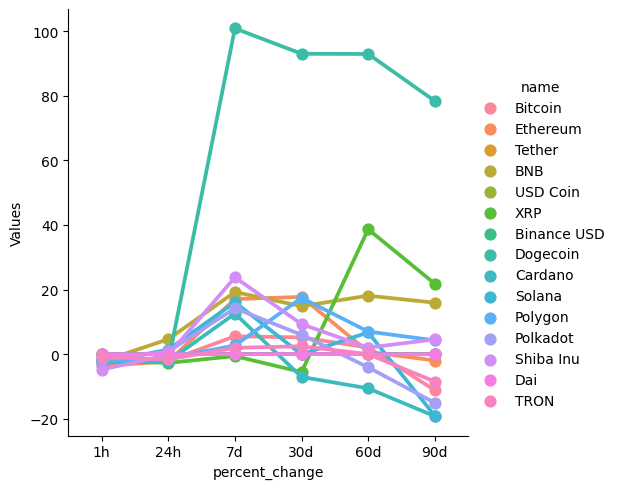

In [27]:
sns.catplot(x = 'percent_change', y = 'Values', hue = 'name', data = df8, kind = 'point')

In [28]:
# We can see that Dogecoin had a massive increase in the past 7 days, what a price growth!

In [69]:
df9 = df3[['name', 'quote.USD.price', 'timestamp']]
df9 = df9.query("name == 'Bitcoin'")
updated_df9['timestamp'] = df9['timestamp'].astype('datetime64[ns]')
updated_df9

,name,quote.USD.price,timestamp
0,Bitcoin,20287.45909,2022-10-31 14:41:54.175472
15,Bitcoin,20293.46429,2022-10-31 14:42:54.812963
30,Bitcoin,20308.90474,2022-10-31 14:43:57.342811
45,Bitcoin,20308.90474,2022-10-31 14:44:57.978553
60,Bitcoin,20346.36617,2022-10-31 14:45:59.596830


In [71]:
type(updated_df9['timestamp'])

pandas.core.series.Series

(array([19296.6125    , 19296.61284722, 19296.61319444, 19296.61354167,
        19296.61388889, 19296.61423611, 19296.61458333, 19296.61493056,
        19296.61527778]),
 [Text(19296.6125, 0, '14:42:00'),
  Text(19296.612847222223, 0, '14:42:30'),
  Text(19296.613194444446, 0, '14:43:00'),
  Text(19296.613541666666, 0, '14:43:30'),
  Text(19296.61388888889, 0, '14:44:00'),
  Text(19296.614236111112, 0, '14:44:30'),
  Text(19296.614583333332, 0, '14:45:00'),
  Text(19296.614930555555, 0, '14:45:30'),
  Text(19296.61527777778, 0, '14:46:00')])

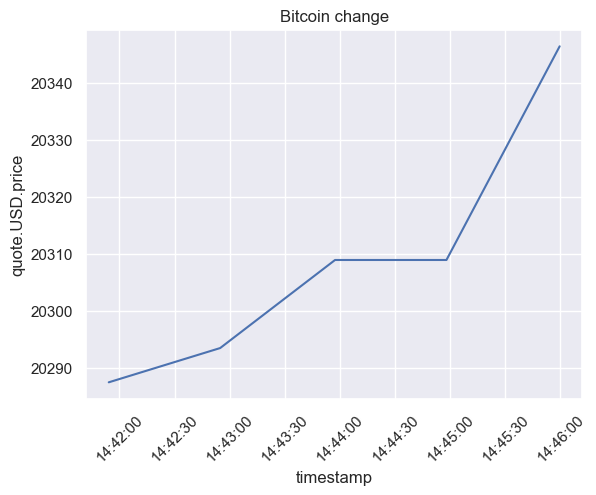

In [74]:
sns.set_theme(style = "darkgrid")
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = updated_df9).set(title = 'Bitcoin change')
plt.xticks(rotation = 45)